In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [29]:
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]
X,y = make_blobs(n_samples = 1000, cluster_std = cluster_std, centers=centroids,n_features=2, random_state=2)

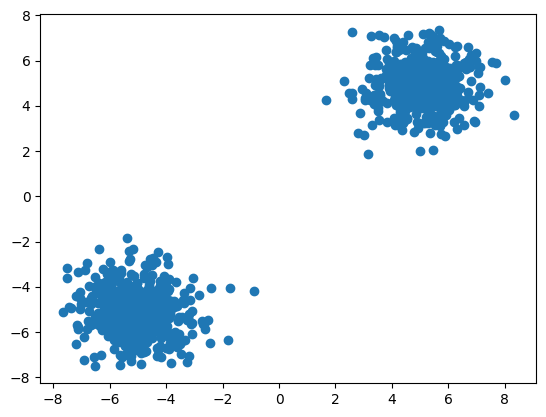

In [30]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [31]:
import random
import numpy as np

class kMeans:
  def __init__(self,n_clusters=2, max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self,X):
    random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centroids = X[random_index]
    for i in range(self.max_iter):
      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
      self.centroids = self.move_centroids(X,cluster_group)
      if  (old_centroids == self.centroids).all():
        break
    return cluster_group

  def assign_clusters(self,X):
    cluster_group = []
    distences = []
    for row in X:
      for centroid in self.centroids:
        distences.append(np.sqrt(np.dot(row-centroid, row-centroid)))
      min_distance = min(distences)
      cluster_group.append(distences.index(min_distance))
      distences.clear()
    return np.array(cluster_group)

  def move_centroids(self,X,cluster_group):
    new_centroids = []
    cluster_type=np.unique(cluster_group)
    for type in cluster_type:
      new_centroids.append(X[cluster_group==type].mean(axis=0))

    return np.array(new_centroids)






In [32]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
km = kMeans(n_clusters=2, max_iter=100)
cluster_group = km.fit_predict(X_train)

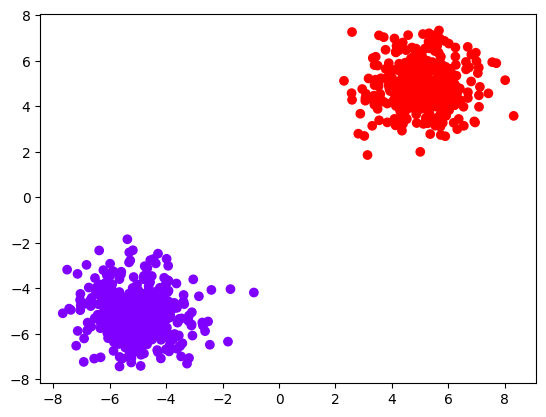

In [34]:
plt.scatter(X_train[:,0],X_train[:,1],c=cluster_group,cmap='rainbow')
plt.show()

In [35]:
y_pred = km.fit_predict(X_test)

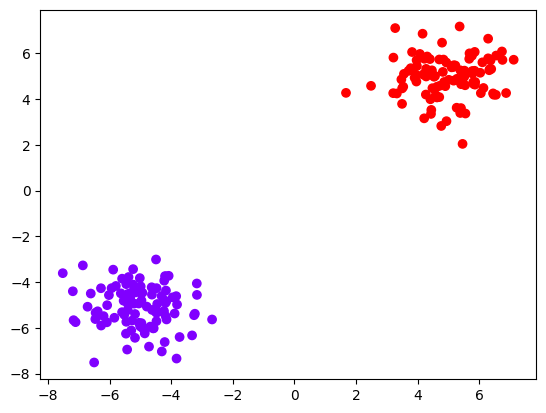

In [37]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='rainbow')
plt.show()

In [38]:
print(silhouette_score(X_test,y_pred))

0.8793527546803321
